#Libraries

In [1]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle

#preprossing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#evaluate model
from sklearn.metrics import (confusion_matrix,classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, balanced_accuracy_score, matthews_corrcoef,
                             cohen_kappa_score, fbeta_score, hamming_loss,
                             jaccard_score, brier_score_loss)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, make_scorer
from IPython.core.debugger import set_trace
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load_Models

In [3]:
#Load_Models

import pickle

def load_models(model_paths):
  models = {}
  for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
      models[model_name] = pickle.load(file)
  return models


model_paths ={
    'RFc_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/RFc_model.pkl',
    'GBc_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/GBc_model.pkl',


    'ETc_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/ETc_model.pkl',

    'DTc_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/DTc_model.pkl',
    'KNc_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/KNc_model.pkl',

    'MLP_model': '/content/drive/MyDrive/ASD/Balanced_General/SavedModels/MLP_model.pkl'


}

loaded_models = load_models(model_paths)

#load 4 dataframes after preprossing
X_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_General/DataAfterPreprossing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_General/DataAfterPreprossing/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_General/DataAfterPreprossing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_General/DataAfterPreprossing/y_test.csv')

classifiers = [
    'Random Forest',
    'Gradient Boosting',
    'Extra Trees',
    'Decision Tree',
    'K-Neighbors',
    'MLP'


]
RFc_Classifier=RandomForestClassifier(n_estimators=100)
GBc_Classifier=GradientBoostingClassifier(n_estimators=1000)
ETc_Classifier=ExtraTreesClassifier(n_estimators=100)
DTc_Classifier=DecisionTreeClassifier()
KNc_Classifier=KNeighborsClassifier()
MLP_Classifier=MLPClassifier()


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
specificity_results = []
logloss_results = []
balanced_acc_results = []
mcc_results = []
kappa_results = []
f2_results = []
hamming_results = []
jaccard_results = []
brier_results = []

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2260, 26), (440, 26), (2260, 1), (440, 1))

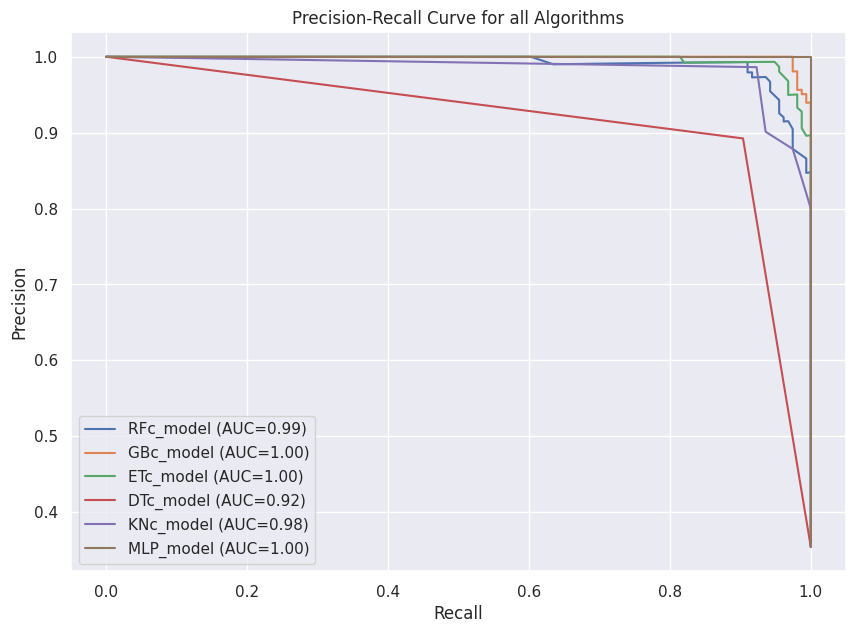

In [5]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 7))

for model_name, model in loaded_models.items():
  if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_test)[:, 1]
  else:
    y_score = model.decision_function(X_test)

  precision, recall, _ = precision_recall_curve(y_test, y_score)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f'{model_name} (AUC={pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for all Algorithms')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/results/all_precision_recall_curves.png')
plt.show()

#Use and Evaluate model




In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
def calc(model, model_name):
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    cm = confusion_matrix(y_test,y_pred)

    # Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    # Logarithmic Loss (Log Loss)
    logloss = log_loss(y_test,y_pred)
    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_test,y_pred)
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test,y_pred)
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test,y_pred)
    # F2 Score
    f2 = fbeta_score(y_test,y_pred,beta=2)
    # Hamming Loss
    hamming = hamming_loss(y_test,y_pred)
    # Jaccard Index
    jaccard = jaccard_score(y_test,y_pred)
    # Brier Score
    brier = brier_score_loss(y_test,y_pred)
    #append results
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)
    specificity_results.append(specificity)
    logloss_results.append(logloss)
    balanced_acc_results.append(balanced_acc)
    mcc_results.append(mcc)
    kappa_results.append(kappa)
    f2_results.append(f2)
    hamming_results.append(hamming)
    jaccard_results.append(jaccard)
    brier_results.append(brier)

    print(f'{model_name}')
    # Plot confusion matrix
    fig,ax=plt.subplots(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')

    # Save confusion matrix
    save_path = f'/content/drive/MyDrive/ASD/Balanced_General/results/{model_name}_confusion_matrix.png'
    plt.savefig(save_path)
    plt.show()

    print('================================================')
    #Classification Report
    print('Classification Report:')
    print(classification_report(y_pred, y_test))
    print('================================================')

   ###########
    # Compute Precision-Recall and ROC curves
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Compute AUC for both curves
    pr_auc = auc(recall, precision)
    roc_auc = auc(fpr, tpr)

    # Plot both curves on the same figure
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall (AUC={pr_auc:.2f})')
    plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.2f})')
    plt.xlabel('Recall / False Positive Rate')
    plt.ylabel('Precision / True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.title(f'{model_name} Precision Recall and ROC Curve')
    plt.savefig(f'/content/drive/MyDrive/ASD/Balanced_General/results/{model_name}precision_recall_ROC_curves.png')
    plt.show()

    print('================================================')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.2f}')

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1:.2f}')
    print('================================================')
    print(f'specificity: {specificity:.2f}')
    print(f'Logarithmic Loss: {logloss:.2f}')
    print(f'Balanced Accuracy: {balanced_acc:.2f}')
    print(f'Matthews Correlation Coefficient (MCC): {mcc:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    print(f'F2 Score: {f2:.2f}')
    print(f'Hamming Loss: {hamming:.2f}')
    print(f'Jaccard Index: {jaccard:.2f}')
    print(f'Brier Score: {brier:.2f}')

RFc_model


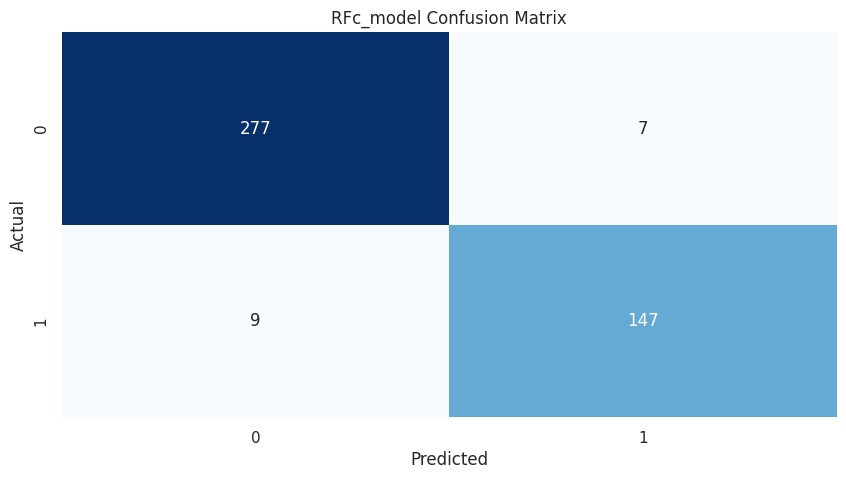

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       286
           1       0.94      0.95      0.95       154

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



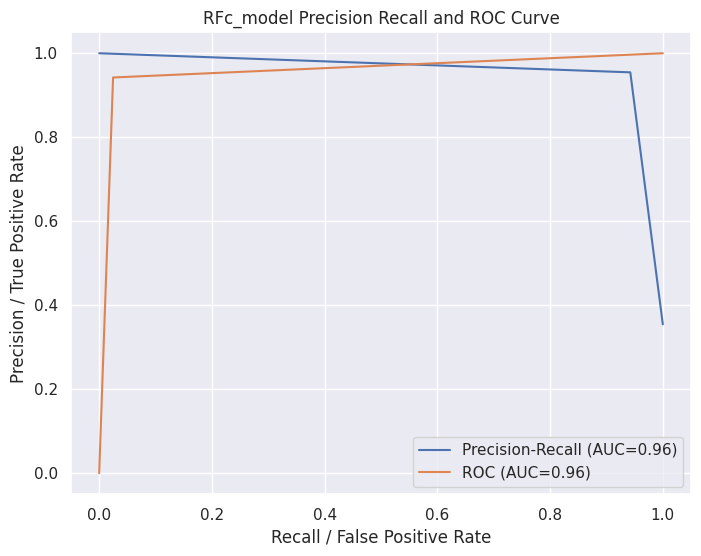

Confusion Matrix:
 [[277   7]
 [  9 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       284
           1       0.95      0.94      0.95       156

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440

Accuracy: 0.96
Precision: [0.35454545 0.95454545 1.        ]
Recall: [1.         0.94230769 0.        ]
F1 Score: 0.95
specificity: 0.98
Logarithmic Loss: 1.31
Balanced Accuracy: 0.96
Matthews Correlation Coefficient (MCC): 0.92
Cohen's Kappa: 0.92
F2 Score: 0.94
Hamming Loss: 0.04
Jaccard Index: 0.90
Brier Score: 0.04
GBc_model


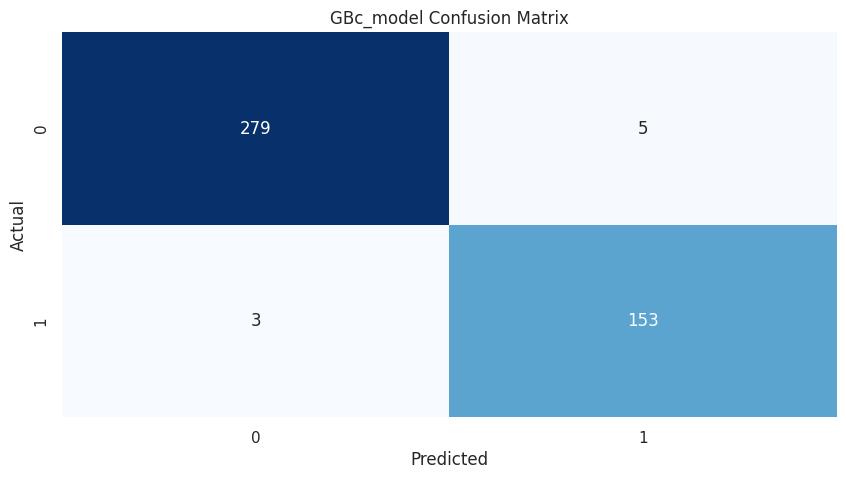

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       282
           1       0.98      0.97      0.97       158

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440



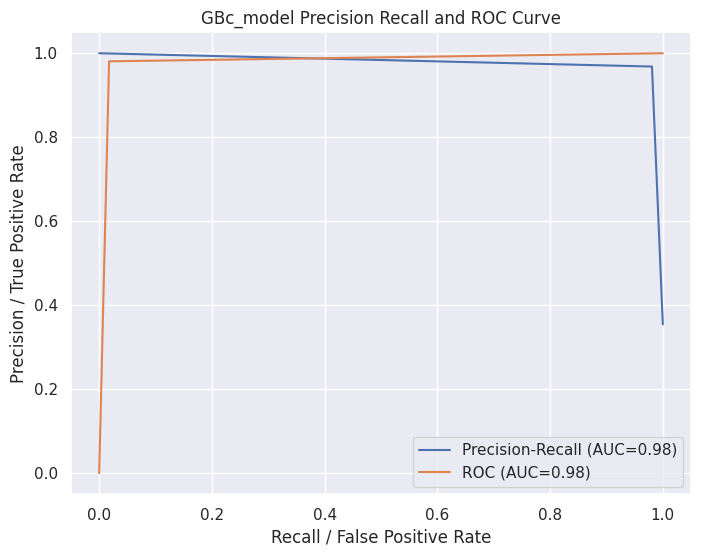

Confusion Matrix:
 [[279   5]
 [  3 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       284
           1       0.97      0.98      0.97       156

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440

Accuracy: 0.98
Precision: [0.35454545 0.96835443 1.        ]
Recall: [1.         0.98076923 0.        ]
F1 Score: 0.97
specificity: 0.98
Logarithmic Loss: 0.66
Balanced Accuracy: 0.98
Matthews Correlation Coefficient (MCC): 0.96
Cohen's Kappa: 0.96
F2 Score: 0.98
Hamming Loss: 0.02
Jaccard Index: 0.95
Brier Score: 0.02
ETc_model


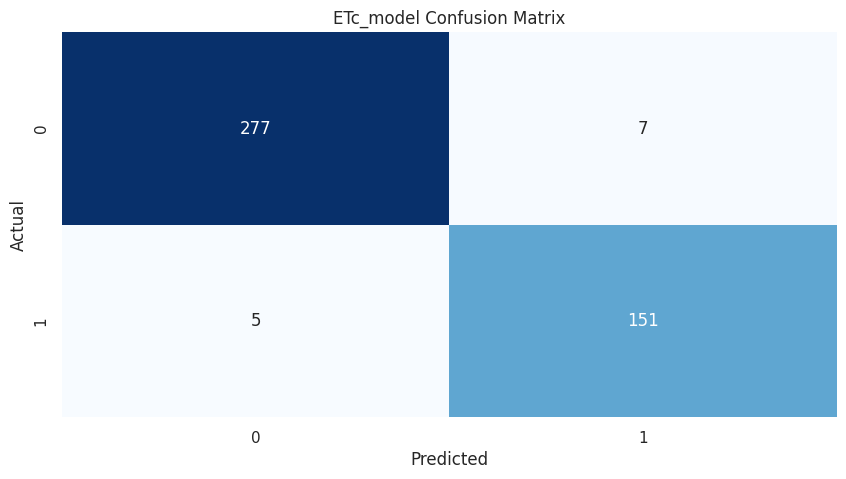

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       282
           1       0.97      0.96      0.96       158

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440



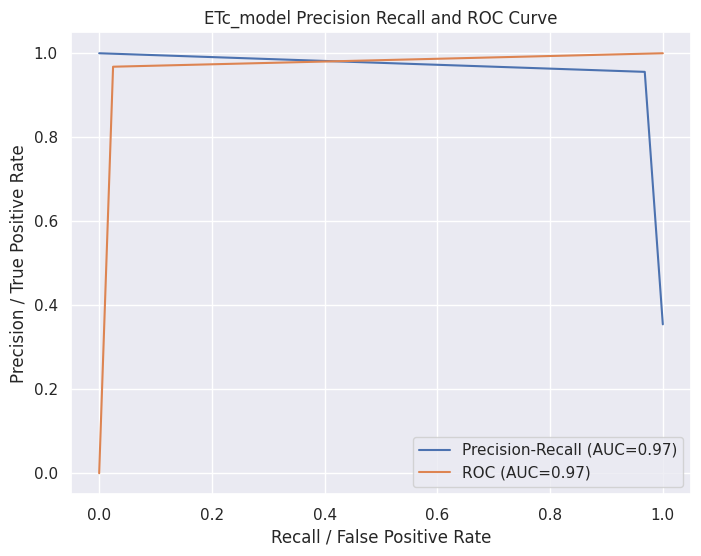

Confusion Matrix:
 [[277   7]
 [  5 151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       284
           1       0.96      0.97      0.96       156

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440

Accuracy: 0.97
Precision: [0.35454545 0.9556962  1.        ]
Recall: [1.         0.96794872 0.        ]
F1 Score: 0.96
specificity: 0.98
Logarithmic Loss: 0.98
Balanced Accuracy: 0.97
Matthews Correlation Coefficient (MCC): 0.94
Cohen's Kappa: 0.94
F2 Score: 0.97
Hamming Loss: 0.03
Jaccard Index: 0.93
Brier Score: 0.03
DTc_model


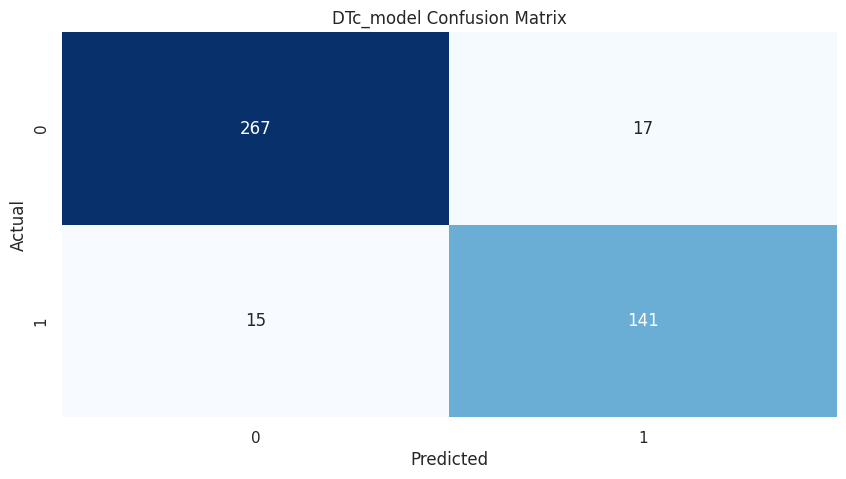

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       282
           1       0.90      0.89      0.90       158

    accuracy                           0.93       440
   macro avg       0.92      0.92      0.92       440
weighted avg       0.93      0.93      0.93       440



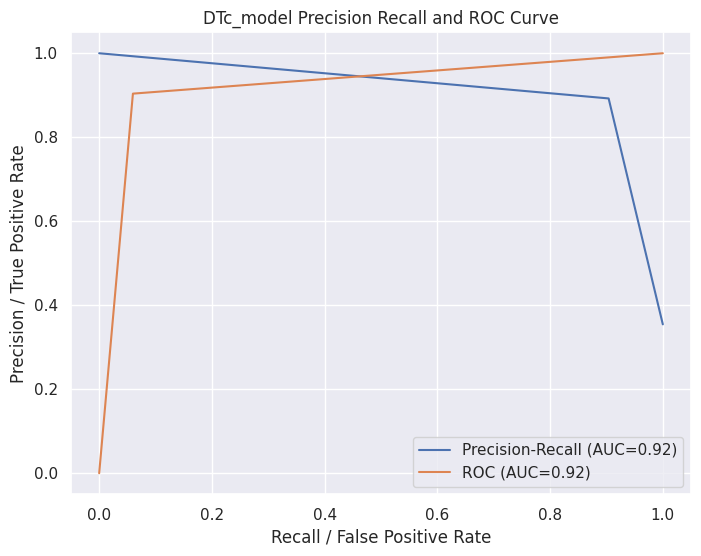

Confusion Matrix:
 [[267  17]
 [ 15 141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       284
           1       0.89      0.90      0.90       156

    accuracy                           0.93       440
   macro avg       0.92      0.92      0.92       440
weighted avg       0.93      0.93      0.93       440

Accuracy: 0.93
Precision: [0.35454545 0.89240506 1.        ]
Recall: [1.         0.90384615 0.        ]
F1 Score: 0.90
specificity: 0.94
Logarithmic Loss: 2.62
Balanced Accuracy: 0.92
Matthews Correlation Coefficient (MCC): 0.84
Cohen's Kappa: 0.84
F2 Score: 0.90
Hamming Loss: 0.07
Jaccard Index: 0.82
Brier Score: 0.07
KNc_model


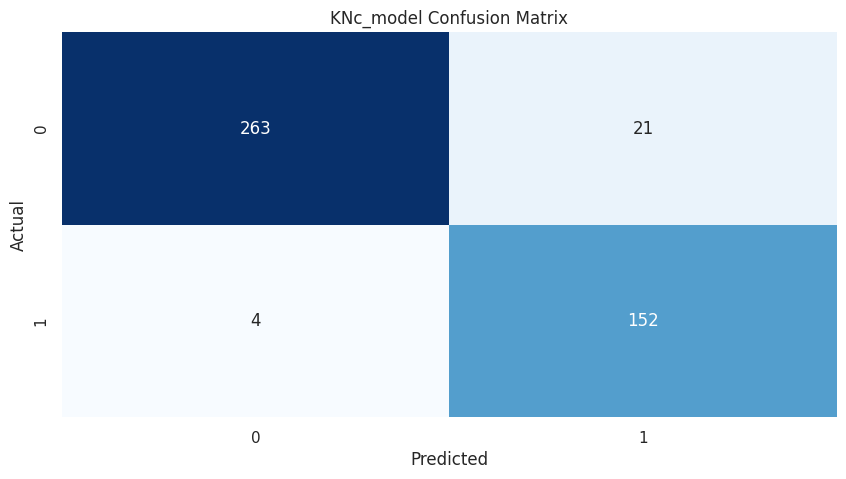

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.95       267
           1       0.97      0.88      0.92       173

    accuracy                           0.94       440
   macro avg       0.95      0.93      0.94       440
weighted avg       0.95      0.94      0.94       440



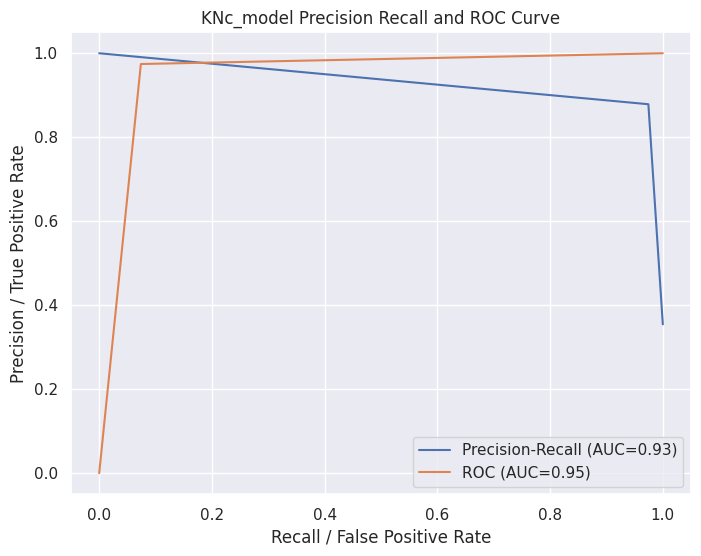

Confusion Matrix:
 [[263  21]
 [  4 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.95       284
           1       0.88      0.97      0.92       156

    accuracy                           0.94       440
   macro avg       0.93      0.95      0.94       440
weighted avg       0.95      0.94      0.94       440

Accuracy: 0.94
Precision: [0.35454545 0.87861272 1.        ]
Recall: [1.         0.97435897 0.        ]
F1 Score: 0.92
specificity: 0.93
Logarithmic Loss: 2.05
Balanced Accuracy: 0.95
Matthews Correlation Coefficient (MCC): 0.88
Cohen's Kappa: 0.88
F2 Score: 0.95
Hamming Loss: 0.06
Jaccard Index: 0.86
Brier Score: 0.06
MLP_model


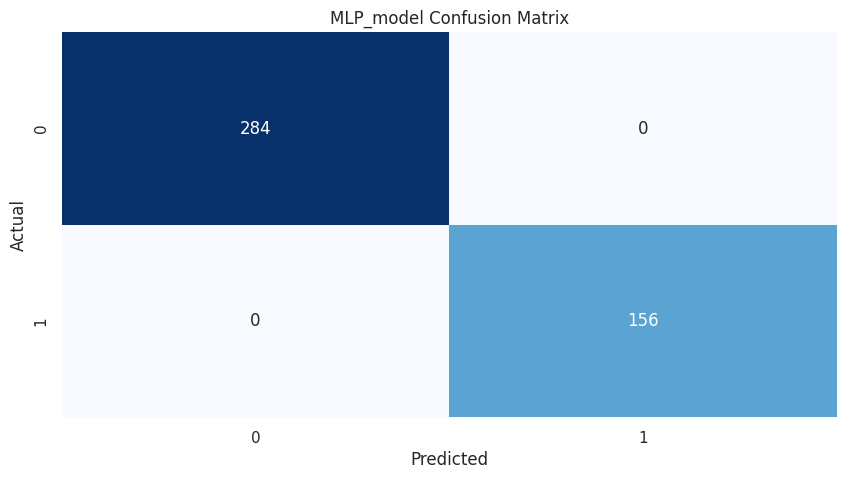

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       156

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



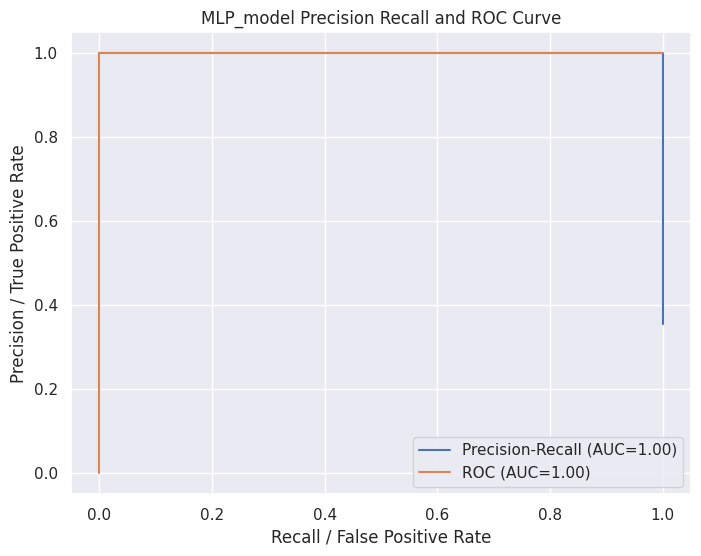

Confusion Matrix:
 [[284   0]
 [  0 156]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       156

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

Accuracy: 1.00
Precision: [0.35454545 1.         1.        ]
Recall: [1. 1. 0.]
F1 Score: 1.00
specificity: 1.00
Logarithmic Loss: 0.00
Balanced Accuracy: 1.00
Matthews Correlation Coefficient (MCC): 1.00
Cohen's Kappa: 1.00
F2 Score: 1.00
Hamming Loss: 0.00
Jaccard Index: 1.00
Brier Score: 0.00


In [7]:
calc(loaded_models['RFc_model'],'RFc_model')
calc(loaded_models['GBc_model'],'GBc_model')
calc(loaded_models['ETc_model'],'ETc_model')
calc(loaded_models['DTc_model'],'DTc_model')
calc(loaded_models['KNc_model'],'KNc_model')
calc(loaded_models['MLP_model'],'MLP_model')



#models Evaluation






In [8]:
finalresult=pd.DataFrame({
    'Algoritms':classifiers,'Accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1_score':f1_results,'specificity':specificity_results,'Logarithmic Loss':logloss_results,'Balanced Accuracy':balanced_acc_results,'MCC':mcc_results,'Cohen\'s Kappa':kappa_results,'F2 Score':f2_results,'Hamming Loss':hamming_results,'Jaccard Index':jaccard_results,'Brier Score':brier_results
    })

# Save DataFrame to Excel
finalresult.to_excel('/content/drive/MyDrive/ASD/Balanced_General/results/finalresult.xlsx', index=False)

finalresult

Algoritms  Accuracy  precision    recall  f1_score  specificity  \
0      Random Forest  0.963636   0.954545  0.942308  0.948387     0.975352   
1  Gradient Boosting  0.981818   0.968354  0.980769  0.974522     0.982394   
2        Extra Trees  0.972727   0.955696  0.967949  0.961783     0.975352   
3      Decision Tree  0.927273   0.892405  0.903846  0.898089     0.940141   
4        K-Neighbors  0.943182   0.878613  0.974359  0.924012     0.926056   
5                MLP  1.000000   1.000000  1.000000  1.000000     1.000000   

   Logarithmic Loss  Balanced Accuracy       MCC  Cohen's Kappa  F2 Score  \
0      1.310678e+00           0.958830  0.920364       0.920319  0.944730   
1      6.553392e-01           0.981582  0.960436       0.960389  0.978261   
2      9.830087e-01           0.971650  0.940629       0.940583  0.965473   
3      2.621357e+00           0.921993  0.841597       0.841556  0.901535   
4      2.047935e+00           0.950208  0.881832       0.878833  0.953576   
5      2.220446e-16           1.000000  1.000000       1.000000  1.000000   

   Hamming Loss  Jaccard Index  Brier Score  
0      0.036364       0.901840     0.036364  
1      0.018182       0.950311     0.018182  
2      0.027273       0.926380     0.027273  
3      0.072727       0.815029     0.072727  
4      0.056818       0.858757     0.056818  
5      0.000000       1.000000     0.000000

#models Comparesion

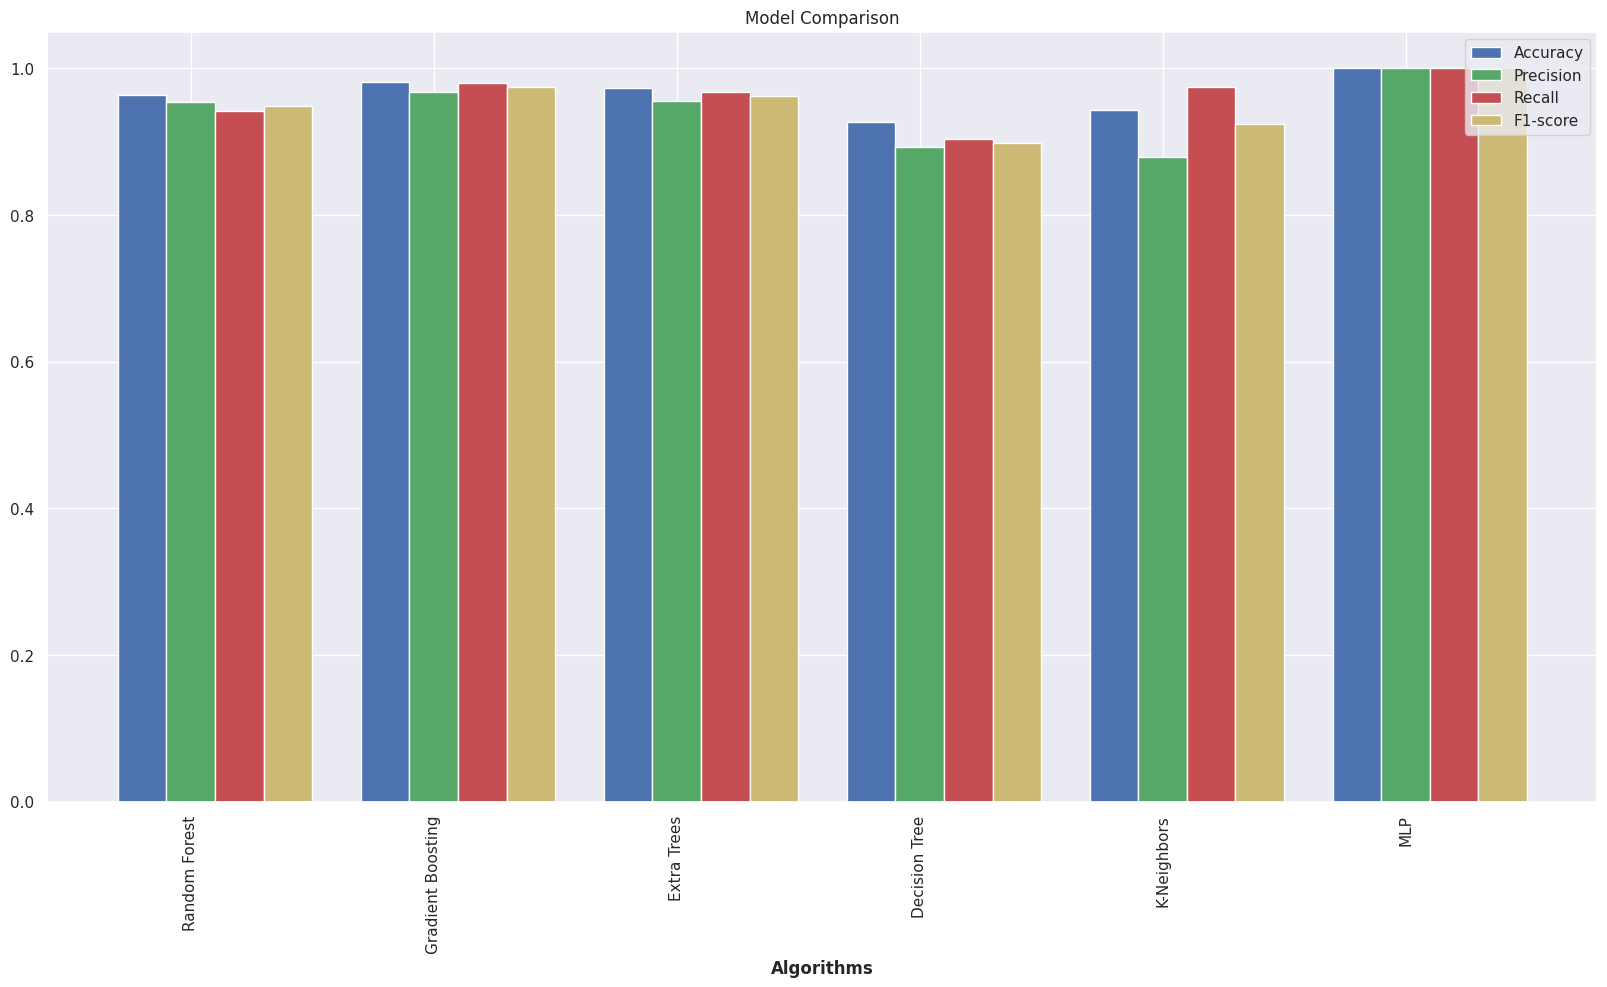

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

bar_width = 0.2  # Adjust as needed

# Set position of bar on X axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.bar(r1, accuracy_results, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_results, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall_results, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_results, color='y', width=bar_width, edgecolor='white', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers, rotation=90)

# Save the figure
plt.savefig('/content/drive/MyDrive/ASD/Balanced_General/results/model_comparison.png')
# Create legend & Show graphic
plt.legend()
plt.title('Model Comparison')
plt.show()



# Explainable AI (XAI)


In [11]:
!pip install shap==0.42.1
!pip install lime==0.2.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.0/548.0 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.48.0
    Uninstalling shap-0.48.0:
      Successfully uninstalled shap-0.48.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=149155738327e60fc43adc2a2f1e2d6ba2f88bc6c526bffd99e67d928797e92c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

def explain_models_with_lime(models, X_train, X_test, instance_indices, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_General/XAI/lime/"):
    explainer = LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=["Non-MI", "MI"],
        mode='classification'
    )

    for model_name, model in models.items():
        print(f"Generating explanations for {model_name}...")

        for idx in instance_indices:
            x_instance = X_test.iloc[idx]
            exp = explainer.explain_instance(x_instance.values, model.predict_proba)
            weights = dict(exp.as_list(label=1))

            # Prepare prediction probabilities
            probs = model.predict_proba([x_instance.values])[0]
            non_mi_prob, mi_prob = probs[0], probs[1]

            features = list(weights.keys())
            importance = [weights[f] for f in features]
            values = [x_instance[f.split()[0]] if f.split()[0] in x_instance else None for f in features]

            fig, axs = plt.subplots(1, 3, figsize=(12, 4), width_ratios=[1, 2, 1])

            # Prediction probabilities
            axs[0].barh(["Non-MI", "MI"], [non_mi_prob, mi_prob], color=["blue", "orange"])
            axs[0].set_xlim(0, 1)
            axs[0].set_title("Prediction probabilities")
            axs[0].invert_yaxis()
            axs[0].set_xticks([0, 0.5, 1])

            # LIME feature weights
            colors = ['orange' if v > 0 else 'blue' for v in importance]
            axs[1].barh(features, importance, color=colors)
            axs[1].axvline(x=0, color='black', linewidth=0.8)
            axs[1].set_title("LIME Explanation")
            axs[1].tick_params(axis='y', labelsize=8)
            axs[1].invert_yaxis()

            # Feature values
            axs[2].axis('off')
            table_data = [[f.split()[0], f"{val:.2f}" if isinstance(val, (int, float)) else str(val)] for f, val in zip(features, values)]
            table = axs[2].table(cellText=table_data, colLabels=["Feature", "Value"], loc="center")
            table.scale(1, 1.4)
            table.auto_set_font_size(False)
            table.set_fontsize(8)

            fig.suptitle(f"{model_name} - Instance {idx}", fontsize=12)
            plt.tight_layout(rect=[0, 0, 1, 0.95])
            save_path = f"{save_path_prefix}lime_{model_name}_{idx}.png"
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close()
            print(f"Saved: {save_path}")


In [13]:
probs = pd.DataFrame({
    idx: model.predict_proba([X_test.iloc[idx]])[0][1]  # MI probability
    for idx in range(len(X_test))
}, index=['MI_Prob']).T

top_instance = probs['MI_Prob'].idxmax()


In [14]:
explain_models_with_lime(
    models=loaded_models,
    X_train=X_train,
    X_test=X_test,
    instance_indices=[top_instance],  # or top_instances
    save_path_prefix="/content/drive/MyDrive/ASD/Balanced_General/XAI/lime/"
)


Generating explanations for RFc_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_RFc_model_314.png
Generating explanations for GBc_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_GBc_model_314.png
Generating explanations for ETc_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_ETc_model_314.png
Generating explanations for DTc_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_DTc_model_314.png
Generating explanations for KNc_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_KNc_model_314.png
Generating explanations for MLP_model...
Saved: /content/drive/MyDrive/ASD/Balanced_General/XAI/lime/lime_MLP_model_314.png


In [ ]:
!pip uninstall shap -y
!pip install shap --upgrade

Found existing installation: shap 0.42.1
Uninstalling shap-0.42.1:
  Successfully uninstalled shap-0.42.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
    Uninstalling slicer-0.0.7:
      Successfully uninstalled slicer-0.0.7


In [ ]:
#Explain models with shap
import shap
import matplotlib.pyplot as plt
models_to_explain = {
    'RFc_model': loaded_models['RFc_model'],
    'GBc_model': loaded_models['GBc_model'],
    'ETc_model': loaded_models['ETc_model'],
    'DTc_model': loaded_models['DTc_model']
}
def explain_models_shap(models, X_test, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_General/XAI/shap/"):


    for model_name, model in models.items():
        print(f"Explaining {model_name}:")

        # Initialize SHAP explainer and compute SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        # Visualize results and save the plots
        save_path = f"{save_path_prefix}{model_name}shap_summary_plot_.png"  # Create the save path
        shap.summary_plot(shap_values, X_test, show=False)  # Generate summary plot without showing it
        plt.savefig(save_path, bbox_inches='tight')  # Save the plot
        plt.close()  # Close the plot to avoid displaying it

explain_models_shap(models_to_explain, X_test)

Explaining RFc_model:
Explaining GBc_model:
Explaining ETc_model:
Explaining DTc_model:


In [ ]:
import shap
import matplotlib.pyplot as plt
models_to_explain1 = {

    'KNc_model': loaded_models['KNc_model'],
    'MLP_model': loaded_models['MLP_model']

}
def explain_models_shap1(models, X_test, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_General/XAI/shap/"):

    for model_name, model in models.items():
        print(f"Explaining {model_name}:")

        # Initialize SHAP explainer and compute SHAP values
        # Using shap.kmeans to sample the background data for faster computation
        background_data = shap.kmeans(X_train, 10) # Using 10 cluster centroids as background
        explainer = shap.KernelExplainer(model.predict_proba, background_data)
        shap_values = explainer.shap_values(X_test)


        # Visualize results and save the plots
        save_path = f"{save_path_prefix}{model_name}shap_summary_plot_.png"  # Create the save path
        shap.summary_plot(shap_values, X_test, show=False)  # Generate summary plot without showing it
        plt.savefig(save_path, bbox_inches='tight')  # Save the plot
        plt.close()  # Close the plot to avoid displaying it

explain_models_shap1(models_to_explain1, X_test)

Explaining KNc_model:


  0%|          | 0/440 [00:00<?, ?it/s]

Explaining MLP_model:


  0%|          | 0/440 [00:00<?, ?it/s]